# Microcolony growth rates
This notebook uses data from several microcolony growth rate assays to measure growth rate distributions for experimentally evolved strains and test for differences in the moments of those distributions between treatments

In [1]:
#User provided input
path = "/Users/chrisgraves/Documents/Yeast_data/Microscopy_data/" #Path of data
expt_ID = c('CG_140905_2_GR','CG_140909_2_GR','CG_140910_2_GR','CB_141007')#Experiment ID for analysis
max_t = 20 #Maximum number of time points recorded in all experiments
library(FNN,lib.loc = "/Library/Frameworks/R.framework/Versions/3.2/Resources/library/")
library(moments,lib.loc = "/Library/Frameworks/R.framework/Versions/3.2/Resources/library/")
library(ggplot2)
library(reshape2)
library(plyr)

In [2]:
#Load data from disk
for (j in 1:length(expt_ID)) {
  
  load(paste(path,expt_ID[j],"/d.Rfile",sep=""))
  load(paste(path,expt_ID[j],"/gr.Rfile",sep=""))
  load(paste(path,expt_ID[j],"/md.Rfile",sep=""))

    #Create data frame containing raw microcolony growth data
        #Microcolony areas
        areas = as.data.frame(cbind(d$areas,matrix(data=NA,nrow = dim(d$areas)[1],ncol = max_t-dim(d$areas)[2])))
        
    
        #NYU computed parameters
        dist = md$mindist #distance to the nearest microcolony
        growth = gr$colparam #growth rate calculations
        old_coords = cbind(md$cxm,md$cym)
        cenfield = md$cenfield
        


        #Experiment date
        date = unlist(strsplit(expt_ID[j],""))[4:9]
        date = paste(date[1],date[2],date[3],date[4],date[5],date[6],sep="")
        date = matrix(data = date,nrow=length(dist),ncol=1)
        
        #Extract strain IDs
        condition.variable.names<-c("Treatment",'Strain')
        number.condition.variables<-length(condition.variable.names)
  
        wells<-vector()
          for(i in 1:length(d$well.list)){
            colonies<-as.vector(unlist(d$well.list[i]))
            wells[colonies]<-names(d$well.list[i])
        }
        
        conditions<-as.vector(d$condition.names[wells])
        conditionsMat<-matrix(NA,length(conditions),number.condition.variables)
  
        if(number.condition.variables==1){
            for(i in 1:length(conditions)){
              conditionsMat[i,]<-conditions[i]
                }
          }
        else{
            for(i in 1:length(conditions)){
          spltCond<-strsplit(conditions[i], "-", fixed=T)
          spltCondVector<-unlist(spltCond)
          conditionsMat[i,]<-spltCondVector
            }
          }
  
      colnames(conditionsMat)<-condition.variable.names
  
      if (j==1) {
        df = cbind(as.data.frame(conditionsMat),growth,as.data.frame(date),dist,cenfield,old_coords,areas)
        colnames(df) = c("treatment","strain",'rate',"r",'foldx',"lag","rate_first","rate_last","date","dist",'cenfield','x','y','t1','t2','t3','t4','t5','t6','t7','t8','t9','t10','t11','t12','t13','t14','t15','t16','t17','t18','t19','t20')
            head}
    else{
      temp = cbind(as.data.frame(conditionsMat),growth,as.data.frame(date),dist,cenfield,old_coords,areas)
      colnames(temp) = c("treatment","strain",'rate',"r",'foldx',"lag","rate_first","rate_last","date","dist",'cenfield','x','y','t1','t2','t3','t4','t5','t6','t7','t8','t9','t10','t11','t12','t13','t14','t15','t16','t17','t18','t19','t20')
      df = rbind(df,temp)
   
        }
}

head(df)
max(df$rate_last,na.rm=T)
    

,treatment,strain,rate,r,foldx,lag,rate_first,rate_last,date,dist,cenfield,x,y,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20
1,P,1,NA,NA,NA,NA,NA,NA,140905,NA,0,NA,NA,100,24,20,191,0,0,0,0,0,0,0,0,NA,NA,NA,NA,NA,NA,NA,NA
2,P,1,NA,NA,NA,NA,NA,NA,140905,NA,0,NA,NA,165,106,108,215,87,416,820,7608,0,0,0,0,NA,NA,NA,NA,NA,NA,NA,NA
3,P,1,NA,NA,NA,NA,NA,NA,140905,NA,0,NA,NA,115,100,72,74,135,0,0,0,0,0,0,0,NA,NA,NA,NA,NA,NA,NA,NA
4,P,1,NA,NA,39.19463,NA,1,8,140905,NA,0,NA,NA,261,149,151,401,737,1652,2081,5840,0,0,0,0,NA,NA,NA,NA,NA,NA,NA,NA
5,P,1,NA,NA,NA,NA,NA,NA,140905,NA,0,NA,NA,36,28,33,0,0,0,0,0,0,0,0,0,NA,NA,NA,NA,NA,NA,NA,NA
6,P,1,NA,NA,NA,NA,NA,NA,140905,NA,0,NA,NA,194,104,237,439,599,0,0,0,0,0,0,0,NA,NA,NA,NA,NA,NA,NA,NA


[1] 20

In [3]:
#Remove measurements of heat shocked cells (labeled with a second H) and change NA to zero
#for missing area measurements
dim(df)
df = subset(df,df$treatment=='H'|df$treatment=='C'|df$treatment=='P')
areas = df[,(dim(df)[2]-19):dim(df)[2]]
areas[,which(is.na(colSums(areas)))] = 0
HS = which(df$date=='141007')

areas[HS,] = c(areas[HS,1:5],rep(0,15))
head(subset(df,df$date=='141007'))
head(areas)

df[(dim(df)[2]-19):dim(df)[2]] = areas
dim(df)


df = subset(df,rowSums(areas!=0)>=5) #require at least 5 measurements to calculate growth rate
dim(df)

head(df)

[1] 829457     33

,treatment,strain,rate,r,foldx,lag,rate_first,rate_last,date,dist,cenfield,x,y,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20
616427,H,1,NA,NA,NA,NA,NA,NA,141007,NA,0,NA,NA,302,247,243,271,766,20,36,0,0,0,0,0,0,0,0,0,0,0,0,0
616428,H,1,NA,NA,NA,NA,NA,NA,141007,NA,0,NA,NA,266,203,38,196,422,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
616429,H,1,NA,NA,NA,NA,NA,NA,141007,NA,0,NA,NA,194,300,240,342,615,323,366,295,240,279,213,150,156,109,528,316,298,944,0,0
616430,H,1,0.294327,0.9961591,3.2125,0,1,5,141007,77.92614,1,83.20512,646.5687,240,298,441,548,771,558,596,612,548,594,578,392,546,401,639,628,590,937,0,0
616431,H,1,0.4182223,0.9849584,5.847134,0,1,5,141007,197.9141,0,106.4318,1056.477,471,716,1206,1372,2754,3186,3047,3040,3052,2911,2831,2797,2829,2860,3028,3090,3074,3628,4056,4000
616432,H,1,0.3605981,0.9574746,4.37,0,1,5,141007,94.56327,1,146.0721,717.2083,300,334,453,644,1311,1220,1203,1309,1259,1305,1255,1219,1216,1214,1299,1340,1357,1464,1689,1660


,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20
1,100,24,20,191,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,165,106,108,215,87,416,820,7608,0,0,0,0,0,0,0,0,0,0,0,0
3,115,100,72,74,135,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,261,149,151,401,737,1652,2081,5840,0,0,0,0,0,0,0,0,0,0,0,0
5,36,28,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,194,104,237,439,599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


[1] 586674     33

[1] 492497     33

,treatment,strain,rate,r,foldx,lag,rate_first,rate_last,date,dist,cenfield,x,y,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20
2,P,1,NA,NA,NA,NA,NA,NA,140905,NA,0,NA,NA,165,106,108,215,87,416,820,7608,0,0,0,0,0,0,0,0,0,0,0,0
3,P,1,NA,NA,NA,NA,NA,NA,140905,NA,0,NA,NA,115,100,72,74,135,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,P,1,NA,NA,39.19463,NA,1,8,140905,NA,0,NA,NA,261,149,151,401,737,1652,2081,5840,0,0,0,0,0,0,0,0,0,0,0,0
6,P,1,NA,NA,NA,NA,NA,NA,140905,NA,0,NA,NA,194,104,237,439,599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,P,1,NA,NA,NA,NA,NA,NA,140905,NA,0,NA,NA,332,320,462,581,1099,1872,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,P,1,NA,NA,NA,NA,NA,NA,140905,NA,0,NA,NA,229,268,310,390,542,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Warning message:
: Removed 1721 rows containing missing values (stat_smooth).Warning message:
: Removed 384 rows containing missing values (stat_smooth).Warning message:
: Removed 189 rows containing missing values (stat_smooth).Warning message:
: Removed 102 rows containing missing values (stat_smooth).Warning message:
: Removed 2396 rows containing missing values (geom_point).


Call:
lm(formula = rate ~ dist, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.47883 -0.02541  0.00628  0.03133  0.30057 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4.467e-01  1.799e-04  2483.4   <2e-16 ***
dist        8.118e-05  8.961e-07    90.6   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.05131 on 376008 degrees of freedom
  (116487 observations deleted due to missingness)
Multiple R-squared:  0.02136,	Adjusted R-squared:  0.02136 
F-statistic:  8208 on 1 and 376008 DF,  p-value: < 2.2e-16


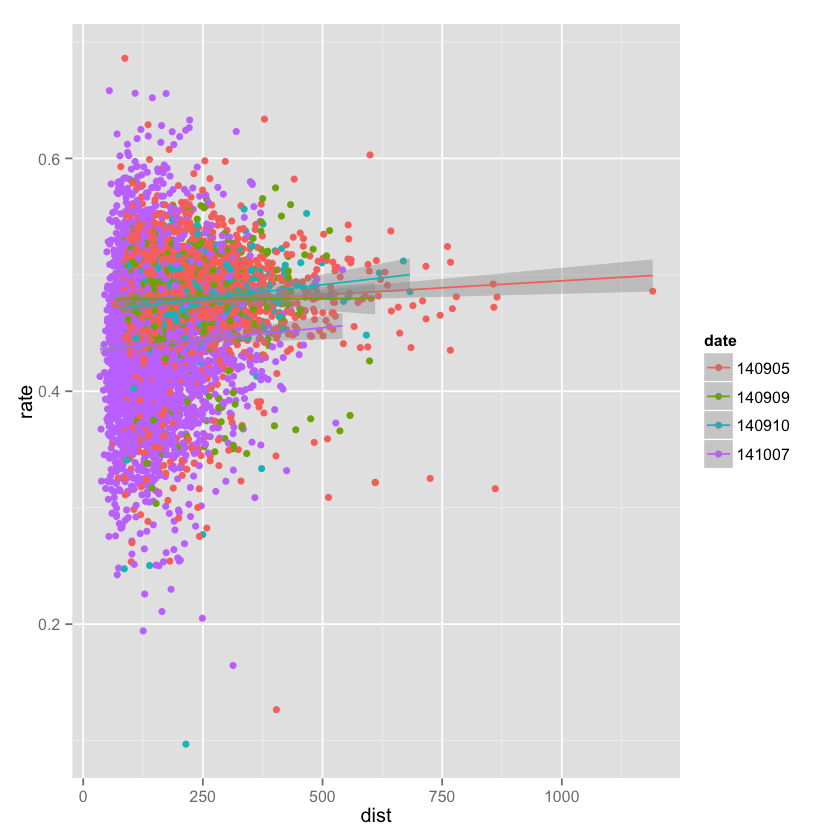

In [4]:
#Check for relationship between growth rate and distance to nearest colony

rand_set = df[sample(nrow(df),10000),]
dist_by_rate = ggplot(rand_set,aes(x=dist,y=rate,color=date))+
geom_point()+
geom_smooth(method=lm)

model = lm(data=df,rate~dist)

dist_by_rate
summary(model)

In [5]:
#Re-calculate colony growth rates to inlcude slow-growing cells that are filtered out by NYU pipeline

areas = df[,(dim(df)[2]-19):dim(df)[2]]
head(areas)

x0= 0:8

#ls_8 estimates growth rates for microcolonies 
ls_8 = function(row) {
    row = row[1:9]
    non_missing = which(row!=0)
    row = row[non_missing]
    x = x0[non_missing]
    var_x = var(x)
    mean_x = mean(x)
    row = log(row)
    b = cov(x,row)/var_x
    a = mean(row)-b*mean_x
    y_pred = a+b*x
    SS_tot = sum((row-mean(row))^2)
    SS_res = sum((row-y_pred)^2)
    r_sq = 1-(SS_res/SS_tot)
    var = var(row)
    foldx = exp(row[length(row)])/exp(row[1])
    return(c(b,r_sq,var,foldx))
    
}

new_rates = apply(areas,1,ls_8)

new_rates=t(new_rates)
colnames(new_rates) = c('new_rate','new_r_sq','new_var','new_foldx')
new_df=cbind(df,new_rates)
head(new_df)
dim(new_df)




,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20
2,165,106,108,215,87,416,820,7608,0,0,0,0,0,0,0,0,0,0,0,0
3,115,100,72,74,135,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,261,149,151,401,737,1652,2081,5840,0,0,0,0,0,0,0,0,0,0,0,0
6,194,104,237,439,599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,332,320,462,581,1099,1872,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,229,268,310,390,542,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


,treatment,strain,rate,r,foldx,lag,rate_first,rate_last,date,dist,cenfield,x,y,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,new_rate,new_r_sq,new_var,new_foldx
2,P,1,NA,NA,NA,NA,NA,NA,140905,NA,0,NA,NA,165,106,108,215,87,416,820,7608,0,0,0,0,0,0,0,0,0,0,0,0,0.4784206,0.6129258,2.240593,46.10909
3,P,1,NA,NA,NA,NA,NA,NA,140905,NA,0,NA,NA,115,100,72,74,135,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.001958021,0.0001273809,0.07524373,1.173913
4,P,1,NA,NA,39.19463,NA,1,8,140905,NA,0,NA,NA,261,149,151,401,737,1652,2081,5840,0,0,0,0,0,0,0,0,0,0,0,0,0.5086317,0.8744621,1.775076,22.37548
6,P,1,NA,NA,NA,NA,NA,NA,140905,NA,0,NA,NA,194,104,237,439,599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.3694915,0.7169701,0.4760449,3.087629
7,P,1,NA,NA,NA,NA,NA,NA,140905,NA,0,NA,NA,332,320,462,581,1099,1872,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.3593951,0.9162741,0.4933862,5.638554
8,P,1,NA,NA,NA,NA,NA,NA,140905,NA,0,NA,NA,229,268,310,390,542,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.2098248,0.9683392,0.1136648,2.366812


[1] 492497     37

Warning message:
: Removed 1790 rows containing missing values (stat_smooth).Warning message:
: Removed 353 rows containing missing values (stat_smooth).Warning message:
: Removed 180 rows containing missing values (stat_smooth).Warning message:
: Removed 93 rows containing missing values (stat_smooth).Warning message:
: Removed 2416 rows containing missing values (geom_point).


Call:
lm(formula = new_rate ~ rate, data = new_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.38259 -0.00431  0.00642  0.01393  0.21188 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.0807872  0.0003535   228.5   <2e-16 ***
rate        0.7921520  0.0007618  1039.8   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02423 on 376008 degrees of freedom
  (116487 observations deleted due to missingness)
Multiple R-squared:  0.742,	Adjusted R-squared:  0.742 
F-statistic: 1.081e+06 on 1 and 376008 DF,  p-value: < 2.2e-16


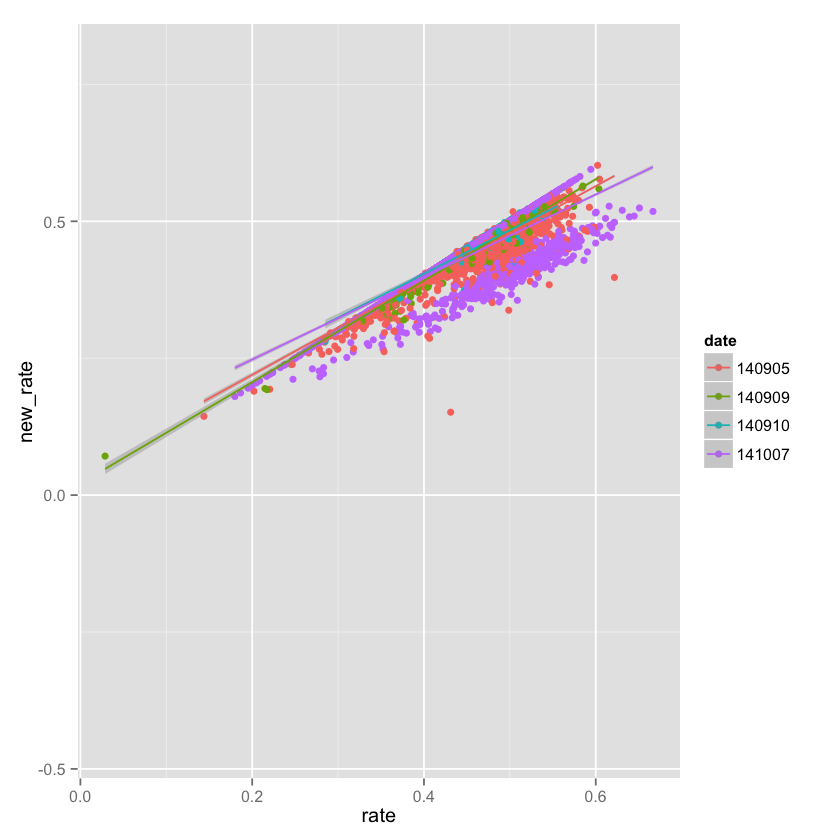

In [6]:
rand_set = new_df[sample(nrow(df),10000),]
new_vs_old = ggplot(rand_set,aes(x=rate,y=new_rate,color=date))+
geom_point()+
geom_smooth(method=lm)

new_vs_old
model = lm(data=new_df,new_rate~rate)
summary(model)
        

In [7]:
head(subset(new_df,new_df$date=='141007'))

,treatment,strain,rate,r,foldx,lag,rate_first,rate_last,date,dist,cenfield,x,y,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,new_rate,new_r_sq,new_var,new_foldx
616427,H,1,NA,NA,NA,NA,NA,NA,141007,NA,0,NA,NA,302,247,243,271,766,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.1954241,0.4093089,0.2332625,2.536424
616428,H,1,NA,NA,NA,NA,NA,NA,141007,NA,0,NA,NA,266,203,38,196,422,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.08879267,0.02376823,0.8292729,1.586466
616429,H,1,NA,NA,NA,NA,NA,NA,141007,NA,0,NA,NA,194,300,240,342,615,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.2438556,0.7772459,0.1912702,3.170103
616430,H,1,0.294327,0.9961591,3.2125,0,1,5,141007,77.92614,1,83.20512,646.5687,240,298,441,548,771,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.2943281,0.9923404,0.2182442,3.2125
616431,H,1,0.4182223,0.9849584,5.847134,0,1,5,141007,197.9141,0,106.4318,1056.477,471,716,1206,1372,2754,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.4182248,0.9701545,0.4507323,5.847134
616432,H,1,0.3605981,0.9574746,4.37,0,1,5,141007,94.56327,1,146.0721,717.2083,300,334,453,644,1311,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.3606084,0.9168101,0.3545947,4.37


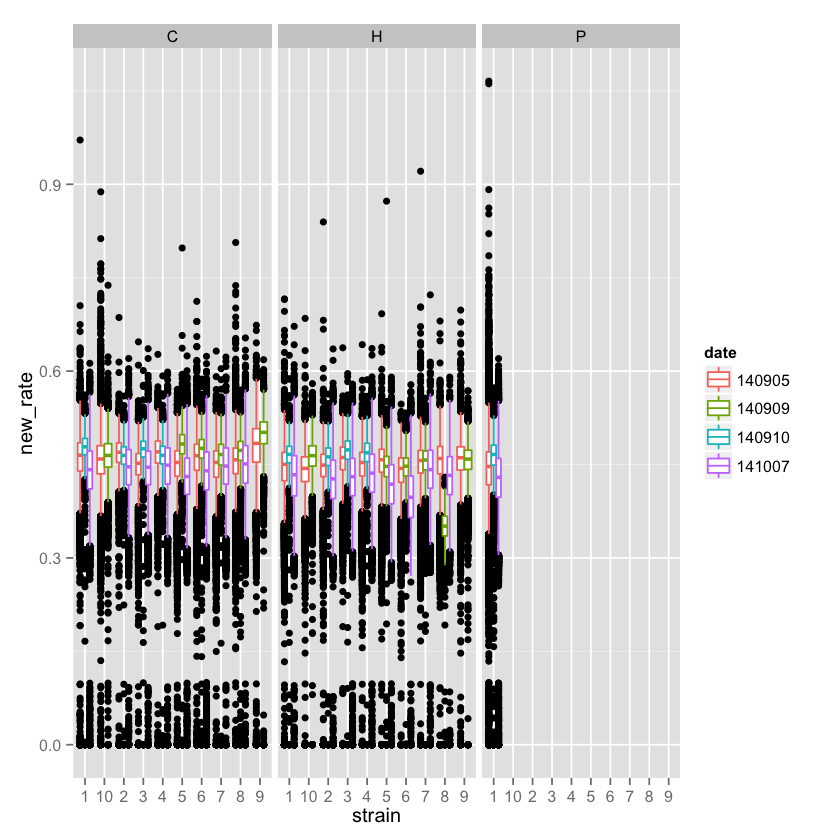

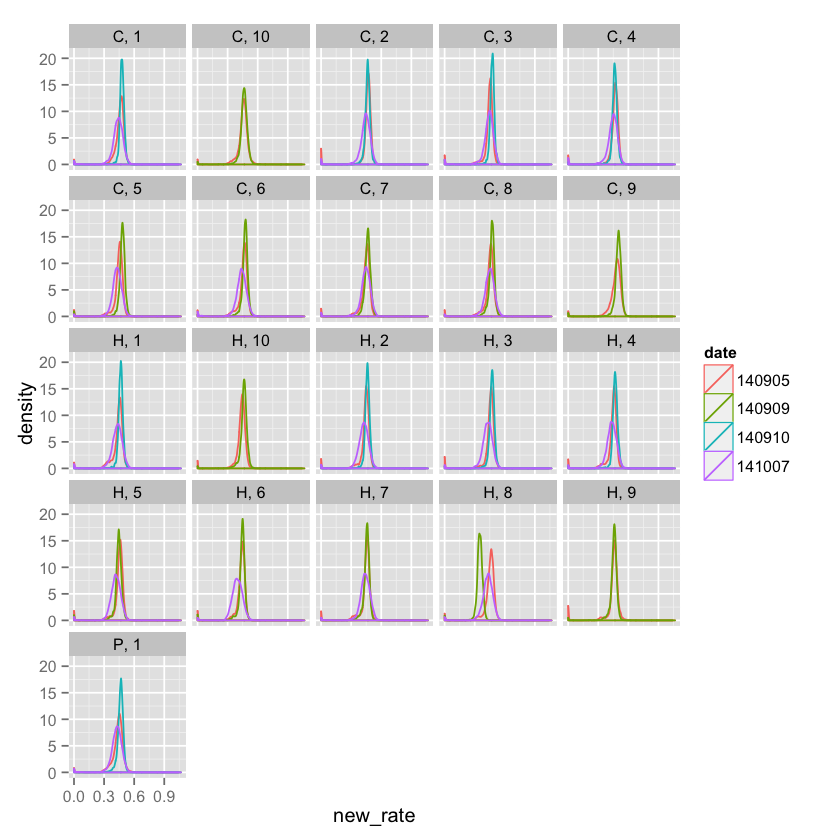

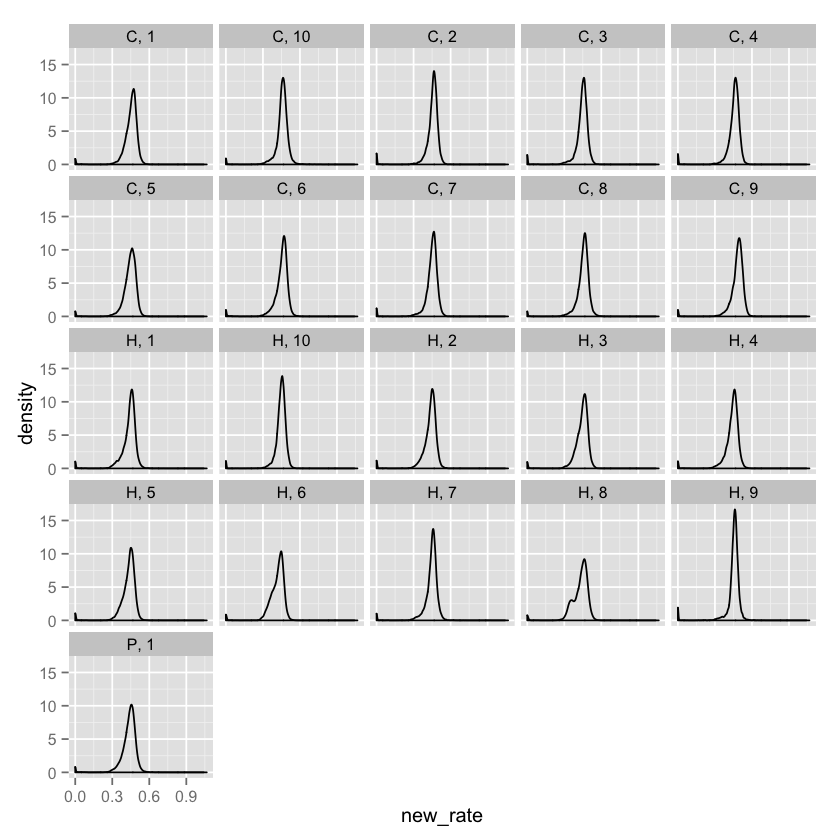

In [8]:
new_df = subset(new_df,new_df$new_r_sq>0.9|abs(new_df$new_rate)<0.1)
new_df = subset(new_df,new_df$new_foldx>3 | abs(new_df$new_rate) <0.1)
new_df$new_rate[new_df$new_rate<0] =0 #Change negative values of rate to zero


growth_dist_new = ggplot(new_df,aes(x=strain,y=new_rate,color = date))+
    geom_boxplot()+
    facet_wrap(~treatment)

growth_hists_new = ggplot(new_df,aes(x=new_rate,color=date))+
    geom_density()+
    facet_wrap(~treatment*strain)

growth_hists_comb = ggplot(new_df,aes(x=new_rate))+
    geom_density()+
    facet_wrap(~treatment*strain)

growth_dist_new
growth_hists_new
growth_hists_comb


In [9]:
#Removes sample H8 from 140909 which appears to be an outlier (petite colony chosen for expt?)
dim(new_df)
new_df = subset(new_df,!(((new_df$treatment=='H')&(new_df$strain==8))&(new_df$date==141007)))
dim(new_df)

[1] 480138     37

[1] 474868     37

In [19]:
#Statistics for comparing distributions of growth rate distributions
new_rate_summary = ddply(new_df,~treatment*strain,N=length(new_rate),summarise,mean=mean(new_rate,na.rm=T),var=var(new_rate),skew=skewness(new_rate),kurt = kurtosis(new_rate))
head(new_rate_summary)

mean_test = wilcox.test(new_rate_summary$mean[new_rate_summary$treatment=='C'],new_rate_summary$mean[new_rate_summary$treatment=='H'])
mean_test

var_test = wilcox.test(new_rate_summary$var[new_rate_summary$treatment=='C'],new_rate_summary$var[new_rate_summary$treatment=='H'])
var_test

skew_test = wilcox.test(new_rate_summary$skew[new_rate_summary$treatment=='C'],new_rate_summary$skew[new_rate_summary$treatment=='H'])
skew_test

kurt_test = wilcox.test(new_rate_summary$kurt[new_rate_summary$treatment=='C'],new_rate_summary$kurt[new_rate_summary$treatment=='H'])
kurt_test

,treatment,strain,N,mean,var,skew,kurt
1,C,1,25711,0.4488938,0.004435895,-3.939879,26.55267
2,C,10,18719,0.4532374,0.004112522,-3.79459,28.29273
3,C,2,15296,0.4483395,0.005372471,-4.479129,27.35351
4,C,3,14941,0.440478,0.004960566,-4.213494,26.0519
5,C,4,17166,0.4504118,0.005231257,-4.448387,27.62841
6,C,5,23568,0.4407411,0.004245345,-3.681818,24.61078



	Wilcoxon rank sum test

data:  new_rate_summary$mean[new_rate_summary$treatment == "C"] and new_rate_summary$mean[new_rate_summary$treatment == "H"]
W = 93, p-value = 0.0004871
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test

data:  new_rate_summary$var[new_rate_summary$treatment == "C"] and new_rate_summary$var[new_rate_summary$treatment == "H"]
W = 44, p-value = 0.6842
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test

data:  new_rate_summary$skew[new_rate_summary$treatment == "C"] and new_rate_summary$skew[new_rate_summary$treatment == "H"]
W = 33, p-value = 0.2176
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test

data:  new_rate_summary$kurt[new_rate_summary$treatment == "C"] and new_rate_summary$kurt[new_rate_summary$treatment == "H"]
W = 74, p-value = 0.07526
alternative hypothesis: true location shift is not equal to 0
